# Implement a Neural Network

This notebook contains useful information and testing code to help you to develop a neural network by implementing the forward pass and backpropagation algorithm in the `models/neural_net.py` file. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models.neural_net import NeuralNetwork

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

You will implement your network in the class `NeuralNetwork` inside the file `models/neural_net.py` to represent instances of the network. You will also need to implement the nonlinearity functions and their corresponding gradient functions in the `models/neural_net.py` file. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays.

The cell below initializes a toy dataset and corresponding model which will allow you to check that your forward and backward pass by using a numeric gradient check.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5


def init_toy_model(nonlinearity, num_layers):
    np.random.seed(0)
    return NeuralNetwork(input_size, [hidden_size]*(num_layers-1), num_classes, num_layers, nonlinearity=nonlinearity)

def init_toy_data():
    np.random.seed(1)

    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

# Implement forward and backward pass

The first thing you will do is implement the forward pass of your neural network along with the loss calculation. The forward pass should be implemented in the `forward` function and you will also need to complete the `sigmoid` and `relu` functions.

Next, you will implement the loss and backward pass using the backpropagation algorithm. Backpropagation will compute the gradient of the loss with respect to the model parameters `W1`, `b1`, ... etc. Use a softmax fuction with cross entropy loss for loss calcuation. Fill in the code blocks in `NeuralNetwork.loss`. 

# Gradient  check

 If you have implemented your forward pass through the network correctly, you can use the following cell to debug your backward pass with a numeric gradient check:

In [4]:
from utils.gradient_check import eval_numerical_gradient

X, y = init_toy_data()

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be around 1e-8 or less for each of the parameters 
# W1, b1,... in your network.

for net_activation in ['sigmoid', 'relu']:
    for num in [2, 3]:
        print(net_activation)
        net = init_toy_model(net_activation, num)
        loss, grads = net.loss(X, y, reg=0.05)

        # these should all be less than 1e-8 or so
        for param_name in grads:
            f = lambda W: net.loss(X, y, reg=0.05)[0]
            param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
            print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

sigmoid
W1 max relative error: 1.000000e+00
b1 max relative error: 2.805134e-08
W2 max relative error: 1.000000e+00
b2 max relative error: 2.443977e-11
sigmoid
W1 max relative error: 1.000000e+00
b1 max relative error: 7.612876e-07
W2 max relative error: 1.000000e+00
b2 max relative error: 4.895316e-10
W3 max relative error: 1.000000e+00
b3 max relative error: 2.300636e-11
relu
W1 max relative error: 1.000000e+00
b1 max relative error: 1.084908e-07
W2 max relative error: 4.510124e-01
b2 max relative error: 2.016018e-10
relu
W1 max relative error: 1.000000e+00
b1 max relative error: 1.409527e-09
W2 max relative error: 6.828397e-01
b2 max relative error: 1.626601e-08
W3 max relative error: 6.173973e-01
b3 max relative error: 9.629022e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers you trained. Look at the function `NeuralNetwork.train` and fill in the missing sections to implement the training procedure. This should be similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `NeuralNetwork.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2 using a two-layer network with relu activation.

Final training loss:  0.007115815458774428


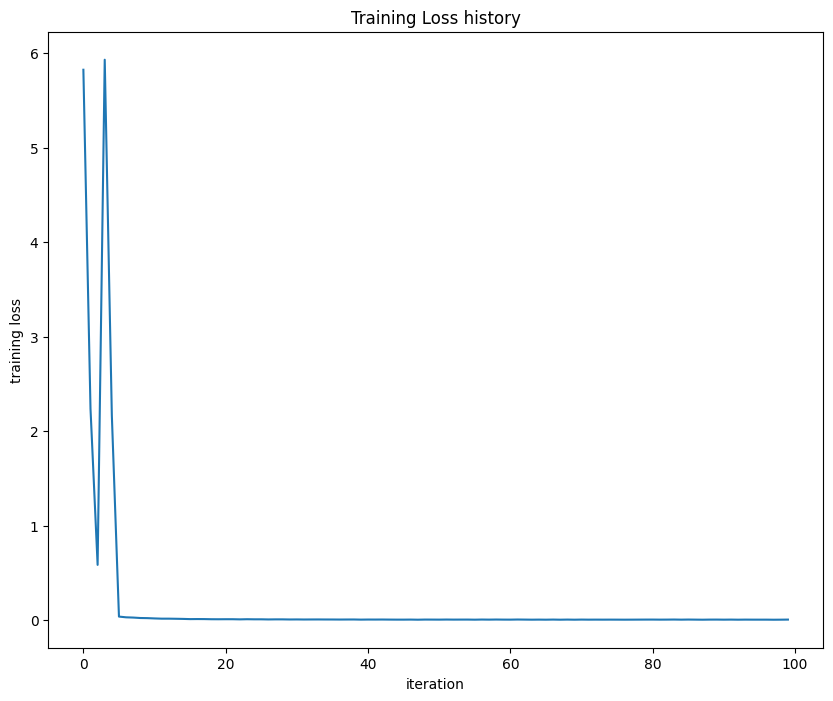

In [6]:
net = init_toy_model('relu', 2)
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()